torch.Size([100, 1])
torch.Size([100, 1])
********************
<generator object Module.parameters at 0x0000025265A3FBC0>
********************
Epoch:  9
Custo: 4369.42529296875000000000
Coeficientes: 
m: 12.16719245910644531250
m (gradiente): -112.69677734375000000000
b: 2.36961269378662109375
b (gradiente): -12.27084445953369140625
Epoch:  19
Custo: 3262.49584960937500000000
Coeficientes: 
m: 22.49860954284667968750
m (gradiente): -96.04013824462890625000
b: 3.40205883979797363281
b (gradiente): -8.86585617065429687500
Epoch:  29
Custo: 2460.86621093750000000000
Coeficientes: 
m: 31.30398941040039062500
m (gradiente): -81.86174011230468750000
b: 4.13926601409912109375
b (gradiente): -6.25513935089111328125
Epoch:  39
Custo: 1879.75012207031250000000
Coeficientes: 
m: 38.81021118164062500000
m (gradiente): -69.78992462158203125000
b: 4.65094614028930664062
b (gradiente): -4.26791095733642578125
Epoch:  49
Custo: 1458.09838867187500000000
Coeficientes: 
m: 45.21015930175781250000
m (gra

Epoch:  589
Custo: 332.56762695312500000000
Coeficientes: 
m: 82.47653961181640625000
m (gradiente): -0.01248066686093807220
b: 4.05600214004516601562
b (gradiente): 0.00302635878324508667
Epoch:  599
Custo: 332.56756591796875000000
Coeficientes: 
m: 82.47768402099609375000
m (gradiente): -0.01068687159568071365
b: 4.05572271347045898438
b (gradiente): 0.00260207056999206543
Epoch:  609
Custo: 332.56762695312500000000
Coeficientes: 
m: 82.47866821289062500000
m (gradiente): -0.00914497673511505127
b: 4.05548286437988281250
b (gradiente): 0.00223510712385177612
Epoch:  619
Custo: 332.56756591796875000000
Coeficientes: 
m: 82.47950744628906250000
m (gradiente): -0.00782445073127746582
b: 4.05527734756469726562
b (gradiente): 0.00192262977361679077
Epoch:  629
Custo: 332.56756591796875000000
Coeficientes: 
m: 82.48022460937500000000
m (gradiente): -0.00670642219483852386
b: 4.05510044097900390625
b (gradiente): 0.00164934247732162476
Epoch:  639
Custo: 332.56756591796875000000
Coeficiente

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

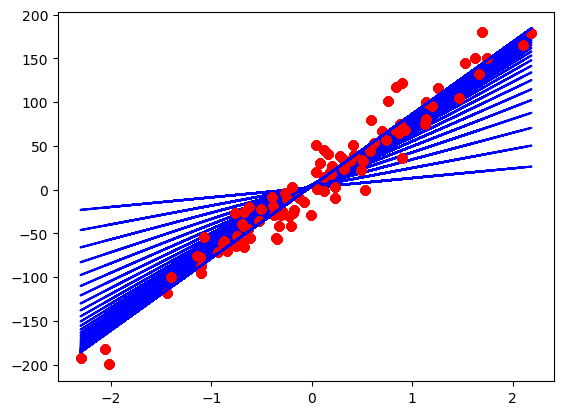

In [10]:
# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# PREPARAÇÃP DA DATA: usando um dataset automatico do 'make regression' com 100 registros de só 1 feature
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

#convert array to torch format called tensor
x = torch.from_numpy(x_numpy.astype(np.float32)) # indepenente variavel
y = torch.from_numpy(y_numpy.astype(np.float32)) # dependente initialazador independente(inicializador)
y = y.view(y.shape[0], 1)  # mudar a dimensão do aray Y para estar em vertical como secada campo fose um registro e não em horizontal

#plotar dataset with lenear regression
print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')



# DEFINICIÇÃO DE MODELO
input_size = 1 # tamanho 1 do input pós há apenas 1 feature
output_size = 1 # tamanho 1 do out put
model = nn.Linear(input_size, output_size) # criação modelo linear

# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.01 # taxa de aprendizagem que vai normalizar a magnutude dos passos na atualização dos pesos(coef.m.x e custo)
criterion = nn.MSELoss() # definir MSE como a função de custo
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #  definir o tipo de optimozador(SGD->Stocstique Gradient Descendent) para atualizar os m(coef. angular) e loss(custo) via os parametros : mx e rate learning
print("*"*20)
print (model.parameters())
print("*"*20)

# LOOP DE TREINAMENTO: 
#1) gerar reta(partindo do valor m e valor b)
#2) calcular cuso aplicando o mse
#3) calcular gradiente, saber onde q  esta o ponto do gradiente no grafico
#4) ajustar os pesos, seja o m e custo

num_epochs = 1000 # numero da época ou repetição do treino do dataset sobre o  modelo
contador_custo = [] # epoca começa com valor aleatorio

for epoch in range(num_epochs):
  #forward pass and loos
  y_hat = model(x) # faz a predição do y partindo do x aplicado no (y^=mx+b)cujo m e b serão produzido aleatoriamente e traça a reta
  loss = criterion(y_hat, y)# calcula o custa (y^-y) sando a função mse a base do y_hat e y
  contador_custo.append(loss) # incrementa cada custo calculado em cada iteração
    
  #backward pass (calcular gradientes)
  loss.backward() # calcula a derivada do mse em relação com m(f(mse)%m) e b(f(mse)%b =>(m = m-rate learning.f(mse)%m e f(mse)%b)
    
  #update (atualizar os pesos)
  optimizer.step() # call of optimiser method to update weight

  if (epoch+1)%10 == 0:
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('Coeficientes: ')
      print('m: {:.20f}'.format(model.weight.data.detach().item()))
      print('m (gradiente): {:.20f}'.format(model.weight.grad.detach().item()))
      print('b: {:.20f}'.format(model.bias.data.detach().item()))
      print('b (gradiente): {:.20f}'.format(model.bias.grad.detach().item()))
      #for p in model.parameters():
      #  print('{:.2f}'.format(p.data.detach().item()))
      #  print('{:.2f}'.format(p.grad.detach().item()))
      previsao_final = y_hat.detach().numpy()
      plt.plot(x_numpy, y_numpy, 'ro') 
      plt.plot(x_numpy, previsao_final, 'b')

  #limpar o otimizador
  optimizer.zero_grad()
    
# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

